In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms

In [2]:
class MNISTDataset(Dataset):
    def __init__(self, root, transform=None):
        self.dataset = datasets.MNIST(root=root, train=True, download=True, transform=transform)

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        return self.dataset[idx]

In [3]:
import time

def loading_time_calculator(dataloader):
    t1 = time.time()
    for data in dataloader:
        pass
    t2 = time.time()

    return t2 - t1

In [4]:
# Set up transforms and custom dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

In [5]:
# Batch sizes to compare
batch_sizes = [128, 256, 512, 1024]

In [6]:
custom_dataset = MNISTDataset(root='./dataset', transform=transform)

In [7]:
custom_time = []
for i in batch_sizes:
    custom_dataloader = DataLoader(custom_dataset, batch_size=i, shuffle=True)
    duration = loading_time_calculator(custom_dataloader)
    custom_time.append(duration)

In [8]:
torch_time = []
for i in batch_sizes:
    torch_dataloader = DataLoader(datasets.MNIST(root='./dataset', train=True, download=True, transform=transform), batch_size=i, shuffle=True)
    duration = loading_time_calculator(torch_dataloader)
    torch_time.append(duration)

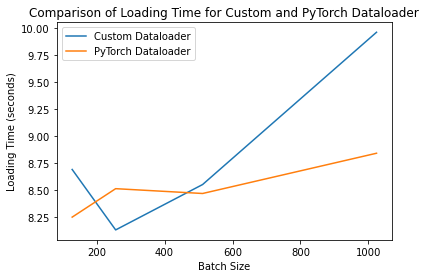

In [9]:
import matplotlib.pyplot as plt

plt.plot(batch_sizes, custom_time, label='Custom Dataloader')
plt.plot(batch_sizes, torch_time, label='PyTorch Dataloader')
plt.xlabel('Batch Size')
plt.ylabel('Loading Time (seconds)')
plt.title('Comparison of Loading Time for Custom and PyTorch Dataloader')
plt.legend()
plt.show()